In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. Σύντομη παρουσίαση του dataset (τι περιγράφει).
To dataset περιγράφει: 
a) τον προσδιορισμο ενος αυτοκινήτου με βάση διαφόρων χαρακτηριστικών του, 
b) την εκχωρημένη βαθμολογία ασφαλιστικού κινδύνου
c) τις κανονικοποιημένες απώλειες κατά την χρήση σε σχέση με άλλα αυτοκίνητα 

Η δεύτερη βαθμολογία (b) αντιστοιχεί στον βαθμό στον οποίο το αυτοκίνητο είναι πιο επικίνδυνο από ό,τι υποδεικνύει η τιμή του. Στα αυτοκίνητα εκχωρείται αρχικά ένα σύμβολο παράγοντα κινδύνου που σχετίζεται με την τιμή του. Στη συνέχεια, εάν είναι πιο επικίνδυνο (ή λιγότερο), αυτό το σύμβολο προσαρμόζεται μετακινώντας το προς τα πάνω (ή προς τα κάτω) στην κλίμακα. Οι αναλογιστές αποκαλούν αυτή τη διαδικασία "συμβολισμό". Η τιμή +3 δείχνει ότι το αυτοκίνητο είναι επικίνδυνο, -3 ότι είναι πιθανώς αρκετά ασφαλές.

Οι παραπανω μεταβλητες αφορουν χαρακτηριστικα για ασφαλιστικες μελετες και δεν θα χρησιμοποιηθουν στην ανάλυσή μας. Θέλουμε να προβλέψουμε την τιμή με βάση τα υπόλοιπα χαρακτηριστικά 


2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;

#Δειγμάτων: 205
#Χαρακτηριστικών: 26

Μη διατεταγμένα χαρακτηριστικά είναι  a) symboling  b) make c) fuel-type d)body-style e)drive wheels f)engine location g) fuel system 

3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;
Οι επικεφαλίδες δεν υπήρχαν στο αρχικό dataset αλλά φορτώθηκαν απο το αρχειο names. Όσο για την αρίθμηση γραμμών υπάρχει το ανάλογο index 

4. Ποια / ποιες είναι οι κολόνες με τις μεταβλητές - στόχους;
H κολόνα με την μεταβλητή στόχο είναι αυτή της τιμής - 'price'

5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?
Mετατρέψαμε τo datatype για διάφορες μεταβλητές όπως φαίνεται στον αντίστοιχο πίνακα (πριν και μετα). Επίσης κανονικοποιούμε τα δεδομένα για να διευκολύνουμε τις συγκρίσεις. Τέλος αλλάζουμε 

6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;

**μεταβλητή / #δειγμάτων / %επι του συνόλου **

normalized-losses/41/20%

price/4/2%

stroke/4/2%

bore/4/2%

peak-rpm/2/1%

num-of-doors/2/1%

horsepower/2/1%


7. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.

Οι απουσιαζουσες τιμες αντικατασταθηκαν με τους μεσους ορους για τις μεταβλητες: normalized-losses, strokre, bore, peak-rpm, horsepower

Οι απουσιαζουσες τιμες για την μεταβλητη num-of-doors αντικατασταθηκε απο την πιο συνηθες τιμε 'four'

Οι απουσιαζουσες τιμες για την μεταβλητη price μας οδηγησαν να διαγραψουμε ολες τις εγγραφες μιας και ειναι η target μεταβλητη

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [314]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv('../input/auto85/auto.csv', names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In the following window we can observe the Variables and its datatype

In [315]:
print(df.dtypes)


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


### Dive into the data
Replacing any missing data with NaN values

In [316]:
df.replace('?', np.nan, inplace=True)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [317]:
print('Shape of the Automobile Dataset:',df.shape)

Shape of the Automobile Dataset: (205, 26)


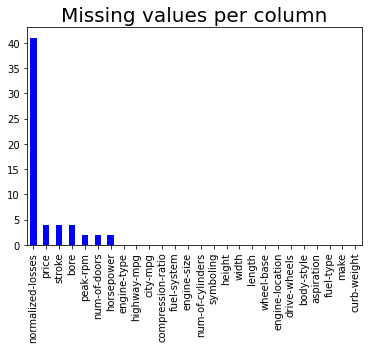

In [318]:
df.isnull().sum().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values per column', fontsize = 20);

In [319]:
missing_data = df.isnull().sum()
missing_data.sort_values(inplace=True, ascending =False)
print( 'Columns with Missing Data:\n',missing_data)

Columns with Missing Data:
 normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
engine-type           0
highway-mpg           0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
symboling             0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
curb-weight           0
dtype: int64


In [320]:
# Check dataTypes of the missing data Columns 
a=[]
print('Mean Values per missing Data Column:')
for i in range(len(missing_data)):
    if missing_data[i]!=0:
        a.append(missing_data.index[i])
        print(missing_data.index[i])

Mean Values per missing Data Column:
normalized-losses
price
stroke
bore
peak-rpm
num-of-doors
horsepower


### Replace Missing Values
Since the dataset is not very large and the amount of missing data per column
is not large compared with the column length we choose to replace the missing
values with its **columns mean** instead of drop the whole record. For the 
following variables: 
* normalized-losses
* stroke
* bore
* peak-rpm
* horsepower 

In [321]:
mean_norm_losses = df[a[0]].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, mean_norm_losses, inplace=True)

mean_norm_stroke = df[a[2]].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, mean_norm_stroke, inplace=True)

mean_norm_bore = df[a[3]].astype('float').mean(axis=0)
df['bore'].replace(np.nan, mean_norm_bore, inplace = True)

mean_norm_peakRpm = df[a[4]].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, mean_norm_peakRpm, inplace=True)

mean_norm_horsepower = df[a[6]].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, mean_norm_horsepower, inplace=True)


* num-of-doors 

We have a string Value. Thus we replace 
the NaN values with the most frequent value. 

In [322]:
df['num-of-doors'].value_counts().idxmax() #Find value with max occurences

'four'

In [323]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

* price

For the missing values in the latter column we decide to remove 
all the records without value since this is our prediction variable.

In [324]:
df.dropna(subset=['price'], axis=0, inplace = True)
df.reset_index(drop=True, inplace=True)

df.dtypes

 ### Change datatype format for several variables 

In [325]:
print('Data Types prior of the changes:\n',df.dtypes)

Data Types prior of the changes:
 symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [326]:
df[["peak-rpm", "price", "bore", "stroke"]] = df[["peak-rpm", "price", "bore", "stroke"]].astype("float")
df[["wheel-base", "length", "width", "height", "compression-ratio"]]=df[["wheel-base", "length", "width", "height", "compression-ratio"]].astype("float")
df[["curb-weight", "engine-size", "horsepower","city-mpg","normalized-losses" ]]  =df[["curb-weight", "engine-size", "horsepower","city-mpg","normalized-losses" ]].astype("int")



In [327]:
print('Data Types after the changes:\n',df.dtypes)

Data Types after the changes:
 symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [328]:
df2 = df.copy() #To create another DF in different memory position 

K = df2.values[0,:]
Vec = np.zeros_like(K)
for i in range(len(K)):
    #print(type(K[i]),type(K[i])== str )
    if type(K[i])== str:
        Vec[i]=1
        
print(Vec)

[0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]


In [329]:
# Encode the Categorical characteristics using the Label Encodes
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(0,len(Vec)):
    
    if Vec[i]==1:
        df2[df.columns[i]].values[:] = le.fit_transform(df2[df2.columns[i]])[:]

In [155]:
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400.0,23,28,16845.0
197,-1,95,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300.0,19,25,19045.0
198,-1,95,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500.0,18,23,21485.0
199,-1,95,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800.0,26,27,22470.0


### Aλλαγή των μεταβλητών City & Highway mpg σε km/h για καλύτερη κατανόηση 

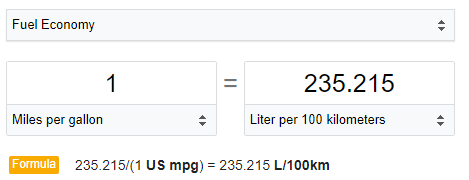

In [330]:
df2['highway-mpg'] = 235/df2['highway-mpg']
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0
1,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0
2,1,122,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0


In [331]:
df2['city-mpg'] = 235/df2['city-mpg']
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


In [332]:
df2 = df2.rename(columns={"highway-mpg":'highway-L/100km', "city-mpg": "city-L/100km"})

### Data Normalization 

df- Initial Dataset

df2 - Dataset with Label Encoder

df3 - Dataset with Label Encoder & MinMaxScaler

In [333]:
df3 = df2.copy()
Vec
Vec2 = (Vec!=1)
Vec2[-1]=False

In [334]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df3[df3.columns[Vec2]] = scaler.fit_transform(df3[df3.columns[Vec2]])
#scaler.fit_transform(df3[df3.columns[1]])
#scaler.fit_transform(df3[df3.columns[i]])[:]


In [337]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,1.0,0.298429,0,1,0,1,0,2,0,0.058309,...,0.260377,5,0.664286,0.290476,0.1250,0.294393,0.346939,0.481481,0.421053,13495.0
1,1.0,0.298429,0,1,0,1,0,2,0,0.058309,...,0.260377,5,0.664286,0.290476,0.1250,0.294393,0.346939,0.481481,0.421053,16500.0
2,0.6,0.298429,0,1,0,1,2,2,0,0.230321,...,0.343396,5,0.100000,0.666667,0.1250,0.495327,0.346939,0.570175,0.453441,16500.0
3,0.8,0.518325,1,1,0,0,3,1,0,0.384840,...,0.181132,5,0.464286,0.633333,0.1875,0.252336,0.551020,0.376157,0.336842,13950.0
4,0.8,0.518325,1,1,0,0,3,0,0,0.373178,...,0.283019,5,0.464286,0.633333,0.0625,0.313084,0.551020,0.621914,0.612440,17450.0


In [336]:
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


<AxesSubplot:>

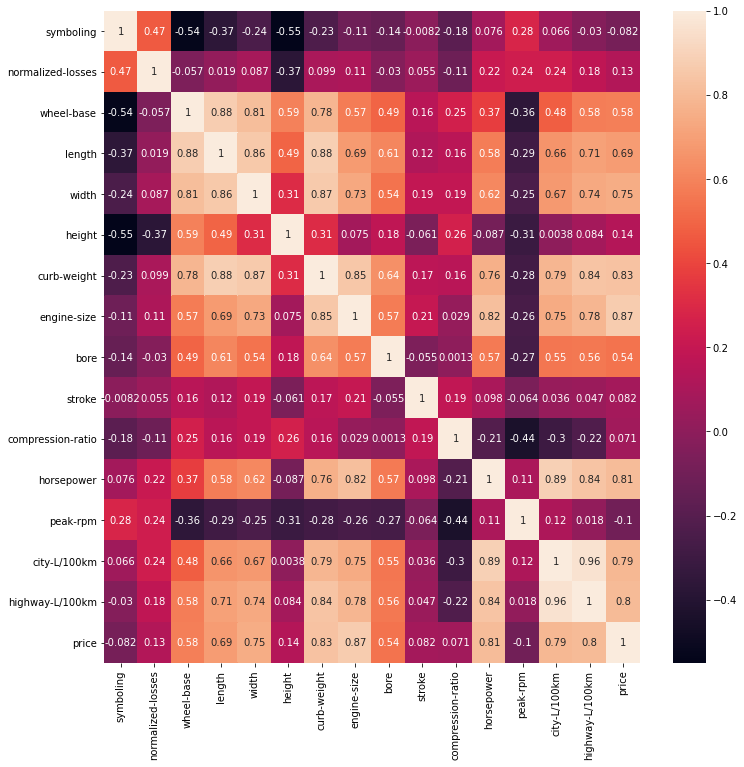

In [338]:
# We want to plot the Correlation matrix to see which features are highly correlated and create new variables

import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), annot=True)

## Create Train - Test Set

In [339]:
# Create X & Y for df2
X = df2[df2.columns[:-1]].values
Y = df2[df2.columns[-1]].values
# Split the Data 
dataset=0

from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(X, Y, test_size=0.2)

In [341]:
# Create X & y for df3
X = df3[df3.columns[:-1]].values
Y = df3[df3.columns[-1]].values
# Split the Data 
dataset = 1
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(X, Y, test_size=0.2)

In [342]:
def plotLoss(test_labels, price_predict):
    x=np.arange(1,len(test_labels)+1,1)
    fig = plt.figure()
    fig.suptitle('Real_Price vs Pred_Price', fontsize=20)              # Plot heading 
    plt.xlabel('test', fontsize=18)                          # X-label
    plt.ylabel('predicted', fontsize=16) 
    plt.scatter(test_labels,price_predict, color= 'r')    
    #plt.plot(x,test_labels, color= 'g')
    #plt.scatter(x,np.abs(test_labels-price_predict), color= 'b')

    plt.show()


In [343]:

def runModel(reg):
     
    reg =reg
    # Training the model
    reg.fit(train,train_labels)

    # Price prediction based on x_test data
    price_predict = reg.predict(test)
    price_pred = np.round(price_predict,2)
    price_pred_df = pd.DataFrame({'Predicted_price':price_pred})

    # Printing first 10 values of price prediction dataframe
    print(price_pred_df.head(10))

    # Accuracy percentage using y_test data
    # Here R^2 method is used to evaluate the model
    accuracy = r2_score(test_labels,price_predict)
    print()
    print("The accuracy of the model based on current test data: ",accuracy*100,"%")
    
    plotLoss(test_labels, price_predict)

    return accuracy*100 

In [344]:
from collections import defaultdict
allScores = defaultdict(list)
allScores2 = defaultdict(list)
allScoresGS = defaultdict(list)

In [345]:
# LINEAR MODELS
from sklearn import linear_model
from sklearn.metrics import r2_score
LinearModels =('LinearRegression', 'Ridge', 'Lasso')
allLinearModels=[]
allLinearModels.append(linear_model.LinearRegression())
allLinearModels.append(linear_model.Ridge(alpha=.5))
allLinearModels.append(linear_model.Lasso(alpha=0.1))


Linear_Model

   Predicted_price
0         22431.55
1          9323.91
2          7945.02
3         15804.30
4          6086.41
5         13669.27
6         26314.90
7         32323.18
8          7435.22
9         20068.20

The accuracy of the model based on current test data:  88.36786388166614 %


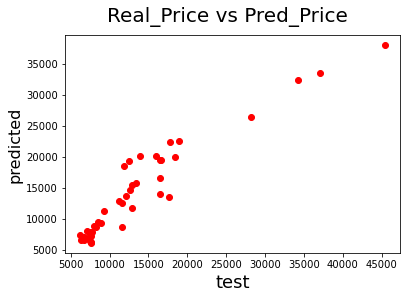

   Predicted_price
0         21528.85
1          9604.68
2          7726.29
3         16022.51
4          5956.52
5         13820.32
6         26054.56
7         32303.77
8          7283.26
9         21017.62

The accuracy of the model based on current test data:  86.78142135965908 %


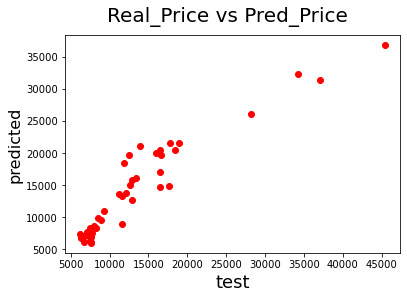

   Predicted_price
0         22424.21
1          9340.73
2          7940.29
3         15792.25
4          6077.44
5         13662.45
6         26303.54
7         32335.68
8          7423.40
9         20101.06

The accuracy of the model based on current test data:  88.34917493193608 %


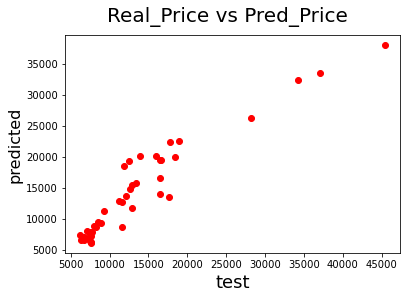

dict_items([(LinearRegression(), [88.36786388166614, 0.19425725936889648]), (Ridge(alpha=0.5), [86.78142135965908, 0.1948409080505371]), (Lasso(alpha=0.1), [88.34917493193608, 0.20788335800170898])])


In [346]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import time 


print('Linear_Model\n')
all_Linear_Scores={}
for i in range(0,len(allLinearModels)):
    start_time= time.time()
    reg = allLinearModels[i]
    
    allScores[allLinearModels[i]].append(runModel(reg))
    timeS =time.time()-start_time
    allScores[allLinearModels[i]].append(timeS)
    
    #allScores

print(allScores.items())

In [347]:
# GS LinearRegression()

from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]

model =  linear_model.LinearRegression()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
timeGS = time.time() - start_time
print('Time in seconds :%s seconds' %timeGS)

allScoresGS['LinearRegression'].append(result.best_score_*100)
allScoresGS['LinearRegression'].append(result.best_params_)
allScoresGS['LinearRegression'].append(timeGS)
print(allScoresGS)

Best Score: 0.8078863314444165
Best Hyperparameters: {'fit_intercept': False, 'normalize': True}
Time in seconds :2.0046868324279785 seconds
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785]})


In [348]:
# GS Ridge()
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time 

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]

model =  linear_model.Ridge()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeGS = time.time()- start_time

allScoresGS['Ridge'].append(result.best_score_*100)
allScoresGS['Ridge'].append(result.best_params_)
allScoresGS['Ridge'].append(timeGS)
print(allScoresGS)

Best Score: 0.8269906968308295
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785], 'Ridge': [82.69906968308295, {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}, 8.965275287628174]})


In [349]:
# GS linear_model.Lasso()
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time 

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]

model =  linear_model.Lasso()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['max_iter'] = [500, 750, 1000, 1500]
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['selection'] = ['cyclic','random']

# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeGS = time.time()- start_time

allScoresGS['Lasso'].append(result.best_score_*100)
allScoresGS['Lasso'].append(result.best_params_)
allScoresGS['Lasso'].append(timeGS)
print(allScoresGS)

Best Score: 0.8237112037595955
Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785], 'Ridge': [82.69906968308295, {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}, 8.965275287628174], 'Lasso': [82.37112037595955, {'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}, 18.898957014083862]})


Kernel Ridge

   Predicted_price
0         21280.19
1          9680.65
2          7453.11
3         16633.77
4          5869.44
5         14086.86
6         25952.86
7         31954.00
8          7002.15
9         21266.60

The accuracy of the model based on current test data:  85.16012696798637 %


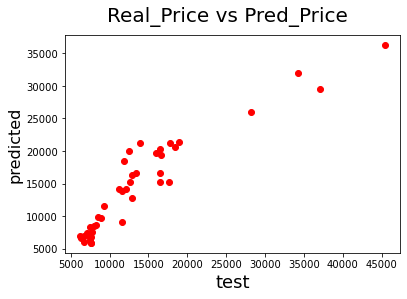

defaultdict(<class 'list'>, {LinearRegression(): [88.36786388166614, 0.19425725936889648], Ridge(alpha=0.5): [86.78142135965908, 0.1948409080505371], Lasso(alpha=0.1): [88.34917493193608, 0.20788335800170898], 'Kernel Ridge': [85.16012696798637, 0.24812602996826172]})


In [350]:
# KERNEL RIDGE REG


from sklearn.kernel_ridge import KernelRidge
# sklearn.kernel_ridge.KernelRidge(alpha=1, *, kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None)

print('Kernel Ridge\n')
reg = KernelRidge(alpha=1.0)
start_time = time.time()

allScores['Kernel Ridge'].append(runModel(reg))
timeS =time.time()-start_time
allScores['Kernel Ridge'].append(timeS)
print(allScores)

In [351]:
# GS KernelRidge()
from pandas import read_csv
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time 

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]

model =  KernelRidge()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['degree'] = [2, 3, 4, 5]
space['coef0'] = [1,2,3]

# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeGS = time.time()- start_time

allScoresGS['KernelRidge'].append(result.best_score_*100)
allScoresGS['KernelRidge'].append(result.best_params_)
allScoresGS['KernelRidge'].append(timeGS)
print(allScoresGS)

Best Score: 0.8183281597701412
Best Hyperparameters: {'alpha': 0.1, 'coef0': 1, 'degree': 2}
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785], 'Ridge': [82.69906968308295, {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}, 8.965275287628174], 'Lasso': [82.37112037595955, {'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}, 18.898957014083862], 'KernelRidge': [81.83281597701412, {'alpha': 0.1, 'coef0': 1, 'degree': 2}, 4.231377840042114]})


SGD Regressor

   Predicted_price
0         19933.20
1         11206.02
2          6732.44
3         17575.41
4          5893.03
5         13313.71
6         24153.79
7         29014.90
8          7948.38
9         20677.27

The accuracy of the model based on current test data:  69.31697461201736 %


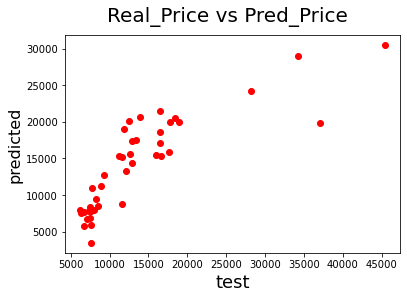

defaultdict(<class 'list'>, {LinearRegression(): [88.36786388166614, 0.19425725936889648], Ridge(alpha=0.5): [86.78142135965908, 0.1948409080505371], Lasso(alpha=0.1): [88.34917493193608, 0.20788335800170898], 'Kernel Ridge': [85.16012696798637, 0.24812602996826172], 'SGD Regressor': [69.31697461201736, 0.18549776077270508]})


In [352]:
# SGDRegressor
from sklearn.linear_model import SGDRegressor
#sklearn.linear_model.SGDRegressor(loss='squared_loss', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)

print('SGD Regressor\n')
reg = SGDRegressor(max_iter=1000, tol=1e-3)
start_time = time.time()


allScores['SGD Regressor'].append(runModel(reg))
timeS =time.time()-start_time
allScores['SGD Regressor'].append(timeS)
print(allScores)

In [353]:
# GS SGDRegressor()
from pandas import read_csv
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time 

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]

model =  SGDRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['loss'] = [ 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
space['penalty'] = ['l2', 'l1', 'elasticnet']
space['max_iter'] = [500,750,1000,1200]




# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeGS = time.time()- start_time

allScoresGS['SGDRegressor'].append(result.best_score_*100)
allScoresGS['SGDRegressor'].append(result.best_params_)
allScoresGS['SGDRegressor'].append(timeGS)
print(allScoresGS)

Best Score: 0.7070272872085114
Best Hyperparameters: {'alpha': 0.0001, 'loss': 'squared_loss', 'max_iter': 1200, 'penalty': 'l2'}
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785], 'Ridge': [82.69906968308295, {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}, 8.965275287628174], 'Lasso': [82.37112037595955, {'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}, 18.898957014083862], 'KernelRidge': [81.83281597701412, {'alpha': 0.1, 'coef0': 1, 'degree': 2}, 4.231377840042114], 'SGDRegressor': [70.70272872085114, {'alpha': 0.0001, 'loss': 'squared_loss', 'max_iter': 1200, 'penalty': 'l2'}, 103.89138197898865]})


KNeighborsRegressor 

   Predicted_price
0          20662.5
1          10443.0
2           5964.0
3          16250.0
4           6460.5
5          13680.0
6          28576.0
7          29620.0
8           6534.5
9          16987.5

The accuracy of the model based on current test data:  87.01423936162213 %


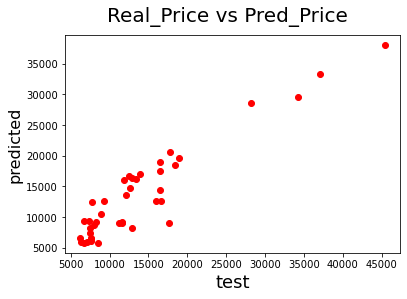

defaultdict(<class 'list'>, {LinearRegression(): [88.36786388166614, 0.19425725936889648], Ridge(alpha=0.5): [86.78142135965908, 0.1948409080505371], Lasso(alpha=0.1): [88.34917493193608, 0.20788335800170898], 'Kernel Ridge': [85.16012696798637, 0.24812602996826172], 'SGD Regressor': [69.31697461201736, 0.18549776077270508], 'KNeighborsRegressor': [87.01423936162213, 0.1965179443359375]})


In [354]:
from sklearn.neighbors import KNeighborsRegressor

# sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

print('KNeighborsRegressor \n')
reg = KNeighborsRegressor(n_neighbors=2)
start_time = time.time()

allScores['KNeighborsRegressor'].append(runModel(reg))
timeS = time.time() - start_time
allScores['KNeighborsRegressor'].append(timeS)
print(allScores)


In [355]:
# GS KNeighborsRegressor()
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time 

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]

model =  KNeighborsRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['n_neighbors'] = [3,4,5,6,7]
space['weights'] = [ 'uniform', 'distance']
space['algorithm'] = ['ball_tree', 'kd_tree', 'brute']
space['leaf_size'] = [20,30,40]
space['p'] = [1,2]



# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeGS = time.time()- start_time

allScoresGS['KNeighborsRegressor'].append(result.best_score_*100)
allScoresGS['KNeighborsRegressor'].append(result.best_params_)
allScoresGS['KNeighborsRegressor'].append(timeGS)
print(allScoresGS)

Best Score: 0.8474135995933623
Best Hyperparameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785], 'Ridge': [82.69906968308295, {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}, 8.965275287628174], 'Lasso': [82.37112037595955, {'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}, 18.898957014083862], 'KernelRidge': [81.83281597701412, {'alpha': 0.1, 'coef0': 1, 'degree': 2}, 4.231377840042114], 'SGDRegressor': [70.70272872085114, {'alpha': 0.0001, 'loss': 'squared_loss', 'max_iter': 1200, 'penalty': 'l2'}, 103.89138197898865], 'KNeighborsRegressor': [84.74135995933622, {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}, 6.652833700180054]})


DecisionTreeRegressor

   Predicted_price
0         17111.18
1          8699.84
2          8699.84
3         17111.18
4          8699.84
5         17111.18
6         28442.67
7         35532.70
8          8699.84
9         17111.18

The accuracy of the model based on current test data:  83.511224202867 %


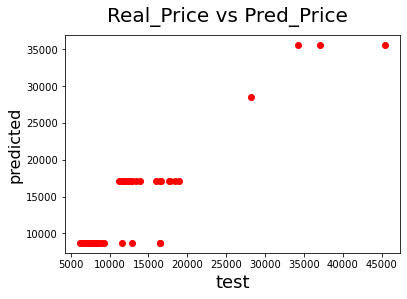

defaultdict(<class 'list'>, {LinearRegression(): [88.36786388166614, 0.19425725936889648], Ridge(alpha=0.5): [86.78142135965908, 0.1948409080505371], Lasso(alpha=0.1): [88.34917493193608, 0.20788335800170898], 'Kernel Ridge': [85.16012696798637, 0.24812602996826172], 'SGD Regressor': [69.31697461201736, 0.18549776077270508], 'KNeighborsRegressor': [87.01423936162213, 0.1965179443359375], 'DecisionTreeRegressor': [83.511224202867, 0.18976974487304688, 83.511224202867, 0.1866910457611084]})


In [357]:
from sklearn.tree import DecisionTreeRegressor

print('DecisionTreeRegressor\n')
#sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
reg = DecisionTreeRegressor(max_depth=2)
start_time= time.time()

allScores['DecisionTreeRegressor'].append(runModel(reg))
timeS = time.time() - start_time
allScores['DecisionTreeRegressor'].append(timeS)
print(allScores)



In [358]:
# GS DecisionTreeRegressor()
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time 

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]

model =  DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['criterion'] = ['mse', 'friedman_mse', 'mae', 'poisson']
space['splitter'] = [ 'best', 'random']
space['min_samples_split'] = [2,3,4]



# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeGS = time.time()- start_time

allScoresGS['DecisionTreeRegressor'].append(result.best_score_*100)
allScoresGS['DecisionTreeRegressor'].append(result.best_params_)
allScoresGS['DecisionTreeRegressor'].append(timeGS)
print(allScoresGS)

Best Score: 0.8589398608969762
Best Hyperparameters: {'criterion': 'friedman_mse', 'min_samples_split': 3, 'splitter': 'best'}
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785], 'Ridge': [82.69906968308295, {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}, 8.965275287628174], 'Lasso': [82.37112037595955, {'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}, 18.898957014083862], 'KernelRidge': [81.83281597701412, {'alpha': 0.1, 'coef0': 1, 'degree': 2}, 4.231377840042114], 'SGDRegressor': [70.70272872085114, {'alpha': 0.0001, 'loss': 'squared_loss', 'max_iter': 1200, 'penalty': 'l2'}, 103.89138197898865], 'KNeighborsRegressor': [84.74135995933622, {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}, 6.652833700180054], 'DecisionTreeRegressor': [85.89398608969762, {'criterion': 'friedman_mse', 'm

RandomForestClassifier 

   Predicted_price
0          23875.0
1          10898.0
2           6529.0
3          16515.0
4           6692.0
5          11850.0
6          25552.0
7          31600.0
8           6229.0
9          17075.0

The accuracy of the model based on current test data:  88.08137251108168 %


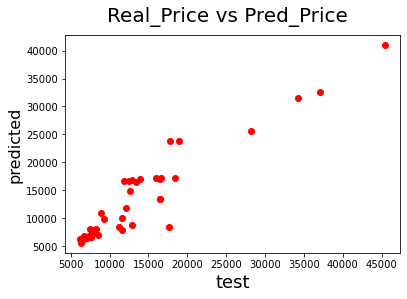

defaultdict(<class 'list'>, {LinearRegression(): [88.36786388166614, 0.19425725936889648], Ridge(alpha=0.5): [86.78142135965908, 0.1948409080505371], Lasso(alpha=0.1): [88.34917493193608, 0.20788335800170898], 'Kernel Ridge': [85.16012696798637, 0.24812602996826172], 'SGD Regressor': [69.31697461201736, 0.18549776077270508], 'KNeighborsRegressor': [87.01423936162213, 0.1965179443359375], 'DecisionTreeRegressor': [83.511224202867, 0.18976974487304688, 83.511224202867, 0.1866910457611084], 'RandomForestClassifier': [88.08137251108168, 0.2190539836883545]})


In [359]:
# ENSEMBLE METHODS- Forests of Randomized Trees
# RandomForestReggressor 
from sklearn.ensemble import RandomForestClassifier

print('RandomForestClassifier \n')
reg =RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
start_time = time.time()

allScores['RandomForestClassifier'].append(runModel(reg))
timeS = time.time() - start_time
allScores['RandomForestClassifier'].append(timeS)
print(allScores)


In [360]:
# GS RandomForestClassifier()
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time 

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]
y = y.astype('int')

model =  RandomForestClassifier()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['criterion'] = ['gini', 'entropy']
space['n_estimators'] = [80,100,200]
space['min_samples_split'] = [2,3,4]
space['max_features'] = ['auto','sqrt','log2']



# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeGS = time.time()- start_time

allScoresGS['RandomForestClassifier'].append(result.best_score_*100)
allScoresGS['RandomForestClassifier'].append(result.best_params_)
allScoresGS['RandomForestClassifier'].append(timeGS)
print(allScoresGS)

Best Score: 0.868686733141057
Best Hyperparameters: {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 80}
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785], 'Ridge': [82.69906968308295, {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}, 8.965275287628174], 'Lasso': [82.37112037595955, {'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}, 18.898957014083862], 'KernelRidge': [81.83281597701412, {'alpha': 0.1, 'coef0': 1, 'degree': 2}, 4.231377840042114], 'SGDRegressor': [70.70272872085114, {'alpha': 0.0001, 'loss': 'squared_loss', 'max_iter': 1200, 'penalty': 'l2'}, 103.89138197898865], 'KNeighborsRegressor': [84.74135995933622, {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}, 6.652833700180054], 'DecisionTreeRegressor': [85.89398608969762, {'criterion': 'fr

ExtraTreesClassifier
 
   Predicted_price
0          23875.0
1          10898.0
2           6529.0
3          16515.0
4           6692.0
5          15510.0
6          25552.0
7          40960.0
8           6229.0
9          17075.0

The accuracy of the model based on current test data:  83.35055460256842 %


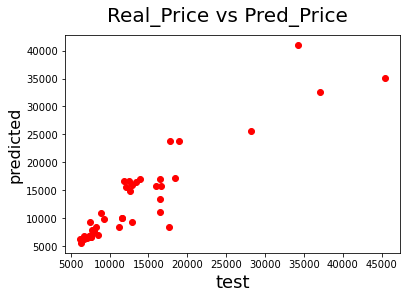

defaultdict(<class 'list'>, {LinearRegression(): [88.36786388166614, 0.19425725936889648], Ridge(alpha=0.5): [86.78142135965908, 0.1948409080505371], Lasso(alpha=0.1): [88.34917493193608, 0.20788335800170898], 'Kernel Ridge': [85.16012696798637, 0.24812602996826172], 'SGD Regressor': [69.31697461201736, 0.18549776077270508], 'KNeighborsRegressor': [87.01423936162213, 0.1965179443359375], 'DecisionTreeRegressor': [83.511224202867, 0.18976974487304688, 83.511224202867, 0.1866910457611084], 'RandomForestClassifier': [88.08137251108168, 0.2190539836883545], 'ExtraTreesClassifier': [83.35055460256842, 0.21839308738708496]})


In [361]:
# ENSEMBLE METHODS - Forests of Randomized Trees
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

print('ExtraTreesClassifier\n ')
reg = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
start_time = time.time()

allScores['ExtraTreesClassifier'].append(runModel(reg))
timeS= time.time()-start_time
allScores['ExtraTreesClassifier'].append(timeS)

print(allScores)


In [362]:
# GS ExtraTreesClassifier()
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import time 

start_time = time.time()

data = df3.values
X,y = data[:,:-1], data[:,-1]
y = y.astype('int')

model =  ExtraTreesClassifier()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['criterion'] = ['gini', 'entropy']
space['n_estimators'] = [80,100,200]
space['min_samples_split'] = [2,3,4]
space['max_features'] = ['auto','sqrt','log2']



# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeGS = time.time()- start_time

allScoresGS['ExtraTreesClassifier'].append(result.best_score_*100)
allScoresGS['ExtraTreesClassifier'].append(result.best_params_)
allScoresGS['ExtraTreesClassifier'].append(timeGS)
print(allScoresGS)

Best Score: 0.8593716314620408
Best Hyperparameters: {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}
defaultdict(<class 'list'>, {'LinearRegression': [80.78863314444165, {'fit_intercept': False, 'normalize': True}, 2.0046868324279785], 'Ridge': [82.69906968308295, {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}, 8.965275287628174], 'Lasso': [82.37112037595955, {'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}, 18.898957014083862], 'KernelRidge': [81.83281597701412, {'alpha': 0.1, 'coef0': 1, 'degree': 2}, 4.231377840042114], 'SGDRegressor': [70.70272872085114, {'alpha': 0.0001, 'loss': 'squared_loss', 'max_iter': 1200, 'penalty': 'l2'}, 103.89138197898865], 'KNeighborsRegressor': [84.74135995933622, {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}, 6.652833700180054], 'DecisionTreeRegressor': [85.89398608969762, {'criterion': '

Voting Regressor 
 GradientBoostingRegresor & RandomForestRegressor & LinearRegression 

   Predicted_price
0         22202.58
1         10067.60
2          7100.61
3         16252.55
4          7020.04
5         14603.88
6         27170.06
7         35341.29
8          6745.92
9         18326.42

The accuracy of the model based on current test data:  91.61256901930818 %


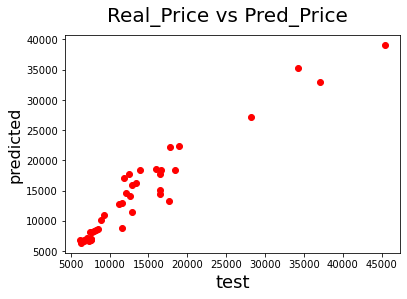

defaultdict(<class 'list'>, {LinearRegression(): [88.36786388166614, 0.19425725936889648], Ridge(alpha=0.5): [86.78142135965908, 0.1948409080505371], Lasso(alpha=0.1): [88.34917493193608, 0.20788335800170898], 'Kernel Ridge': [85.16012696798637, 0.24812602996826172], 'SGD Regressor': [69.31697461201736, 0.18549776077270508], 'KNeighborsRegressor': [87.01423936162213, 0.1965179443359375], 'DecisionTreeRegressor': [83.511224202867, 0.18976974487304688, 83.511224202867, 0.1866910457611084], 'RandomForestClassifier': [88.08137251108168, 0.2190539836883545], 'ExtraTreesClassifier': [83.35055460256842, 0.21839308738708496], 'Voting Regressor': [91.61256901930818, 0.5412044525146484]})


In [363]:
#BOOSTING 
#Voiting Regressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

print('Voting Regressor \n GradientBoostingRegresor & RandomForestRegressor & LinearRegression \n')
reg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
start_time = time.time()


allScores['Voting Regressor'].append(runModel(reg))
timeS = time.time() - start_time
allScores['Voting Regressor'].append(timeS)

print(allScores)


In [388]:
accGS=[]
timeGS=[]
infoGS=[]
for i in allScoresGS.keys():
    print(i)
    if i!=2:
        accGS.append(allScoresGS[i][0])
        infoGS.append(allScoresGS[i][1])
        timeGS.append(allScoresGS[i][2])

LinearRegression
Ridge
Lasso
KernelRidge
SGDRegressor
KNeighborsRegressor
DecisionTreeRegressor
RandomForestClassifier
ExtraTreesClassifier


dict_keys(['LinearRegression', 'Ridge', 'Lasso', 'KernelRidge', 'SGDRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestClassifier', 'ExtraTreesClassifier'])

In [380]:
acc=[]
timee=[]
for i in allScores.keys():
    print(i)
    if i!= 'Voting Regressor':
        acc.append(allScores[i][0])
        timee.append(allScores[i][1])

LinearRegression()
Ridge(alpha=0.5)
Lasso(alpha=0.1)
Kernel Ridge
SGD Regressor
KNeighborsRegressor
DecisionTreeRegressor
RandomForestClassifier
ExtraTreesClassifier
Voting Regressor


In [391]:
print('Best inputs for each model after GS:')
for i in range (0,len(infoGS)):
    print(labels[i])
    print(infoGS[i])
    

Best metrics for GS:
LinearRegression
{'fit_intercept': False, 'normalize': True}
Ridge
{'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}
Lasso
{'alpha': 10, 'fit_intercept': True, 'max_iter': 1500, 'normalize': True, 'selection': 'random'}
KernelRidge
{'alpha': 0.1, 'coef0': 1, 'degree': 2}
SGDRegressor
{'alpha': 0.0001, 'loss': 'squared_loss', 'max_iter': 1200, 'penalty': 'l2'}
KNeighborsRegressor
{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
DecisionTreeRegressor
{'criterion': 'friedman_mse', 'min_samples_split': 3, 'splitter': 'best'}
RandomForestClassifier
{'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 80}
ExtraTreesClassifier
{'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}


In [384]:
len(accGS)

9

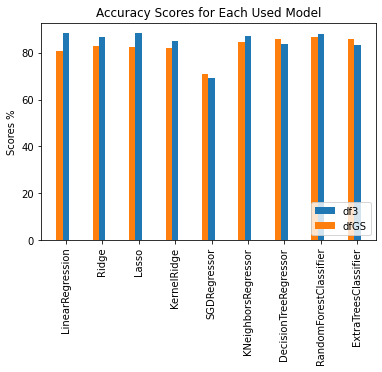

In [386]:
ind = np.arange(0,18,2)
labels = ['LinearRegression','Ridge','Lasso','KernelRidge','SGDRegressor','KNeighborsRegressor','DecisionTreeRegressor','RandomForestClassifier','ExtraTreesClassifier']

plt.bar(ind, acc, width, label='df3')
#plt.bar(ind+width, acc2[:-1], width, label='df2 ') # Accuracy for the dataset without Scaler
plt.bar(ind-width, accGS, width, label='dfGS')

plt.ylabel('Scores %')
plt.title('Accuracy Scores for Each Used Model')


plt.xticks(ind  , labels , rotation=90)
plt.legend(loc='lower right')
plt.show()



In [398]:
print('Train&Prefict in sec for GS: \n')
for i in range (len(timeGS)):
    
    print(labels[i],':', timeGS[i])

Train&Prefict in sec for GS: 

LinearRegression : 2.0046868324279785
Ridge : 8.965275287628174
Lasso : 18.898957014083862
KernelRidge : 4.231377840042114
SGDRegressor : 103.89138197898865
KNeighborsRegressor : 6.652833700180054
DecisionTreeRegressor : 1.820915937423706
RandomForestClassifier : 275.1027498245239
ExtraTreesClassifier : 180.39748549461365


Παρατηρουμε πως για το κανονικοποιημένο dataset df3 τα accuracy ειναι καλυτερα.
Επισης οι χρονοι είναι πολύ μικροτεροι για το για το train και fit στα μοντέλα χωρις GridSearch
κατι που ηταν αναμενόμενο. Στα μοντέλα GridSearch δεν συμπεριλαβαμε  Scaler και LabelEncoder για τα κατηγορικα 
δεδομλενα γεγονός που μάλλον εξηγεί την χαμηλότερη απόδοση των GS μοντέλων. 